# Workshop "Datos: El recurso que tu empresa debe aprovechar"

## Aplicación: Segmentación de clientes con Python

### Objetivo:
En este workshop vamos a realizar una breve introducción a la segmentación de clientes con Python, usando una de las librerías más utilizadas para machine learning: ¡Sklearn! 

En esta aplicación vamos a utilizar una base de datos que contiene descriptores sobre compras en línea de 32 clientes. Nuestro objetivo es tomar este conjunto de información y segmentar a nuestros clientes para mejorar el diseño de estrategias de ventas.

NOTA: Si no tienes conocimiento en Python, ¡no te preocupes! El objetivo es que adquieras una idea de cómo está herramienta te puede servir en tu vida profesional, así que ¡ánimo!

In [1]:
# !pip install sklearn
# !pip install matplotlib
# !pip install pandas

### Librarías útiles

Como es usual, vamos a importar todas las librerías de utilidad para esta aplicación. Adicional a nuestras librerías básicas, importaremos funciones específicas de sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Base de datos

In [3]:
url = 'https://raw.githubusercontent.com/DillanAS/WorkshopBEDU_Datos/main/segmentacion_clientes_Bedu.csv'
df = pd.read_csv(url)

In [4]:
print(df.head())

  costumer  spending_index  ...  basket_index  costumer_score
0       C1        0.040444  ...      0.156690        0.095031
1       C2        0.173822  ...      0.125051        0.162496
2       C3        0.000000  ...      0.112019        0.087851
3       C4        0.024945  ...      0.154435        0.253765
4       C5        0.446445  ...      0.268336        0.082148

[5 rows x 11 columns]


Un punto importante en machine learning es asignar en una matriz de datos únicamente las variables de interés, ya que con estos datos vamos a entrenar el modelo

In [5]:
# Tomemos únicamente las variables explicativas de interés
X = df[['spending_index', 'credit_index', 'credit_score',
       'search_index', 'app_time', 'preference_index', 'wishlist_index',
       'comment_reviews', 'basket_index', 'costumer_score']]

Todas las variables representan indicadores de relacionadas con los patrones de consumo de una serie de clientes. Aunque la escala es la misma entre variables, siempre es útil estandarizar las variables para métodos no supervisados

In [6]:
# Estandarizar variables
ss = StandardScaler()
X_ss = ss.fit_transform(X)

x_df = pd.DataFrame(X_ss, columns = 
['spending_index', 'credit_index', 'credit_score',
       'search_index', 'app_time', 'preference_index', 'wishlist_index',
       'comment_reviews', 'basket_index', 'costumer_score'])
print(x_df.describe().T)

                  count          mean       std  ...       50%       75%       max
spending_index     32.0  1.734723e-17  1.016001  ... -0.261329  0.311060  3.051945
credit_index       32.0  1.214306e-16  1.016001  ... -0.242030  0.823547  2.068357
credit_score       32.0  1.387779e-16  1.016001  ... -0.304926  0.549666  3.597358
search_index       32.0  5.030698e-17  1.016001  ... -0.263558  0.517144  3.124996
app_time           32.0  4.076600e-17  1.016001  ... -0.206294  0.354460  3.873094
preference_index   32.0  4.163336e-17  1.016001  ... -0.273281  0.154911  4.689672
wishlist_index     32.0  2.081668e-17  1.016001  ... -0.241976  0.353929  3.008766
comment_reviews    32.0 -5.204170e-17  1.016001  ... -0.207492  0.005183  4.623518
basket_index       32.0 -6.245005e-17  1.016001  ... -0.270648  0.154366  4.645302
costumer_score     32.0 -2.602085e-17  1.016001  ... -0.344798  0.218714  4.388411

[10 rows x 8 columns]


### Análisis de Componentes Principales

El PCA es una técnica que, en términos simples, nos permite agrupar nuestras variables para así poder reducir el número de descriptores sin perder mucha información. Antes de implementar directamente la técnica, es importante determinar cuántos componentes retener ... en nuestro caso particular puedo adelantarte que con dos componentes podemos explicar el 90% de la variación de los datos

In [7]:
# Crear la instancia PCA y ajustar los datos
pca = PCA()
pca.fit(X_ss)

# Generemos la instancia indicando el número de componentes a retener
pca = PCA(n_components = 2)

# Ajustamos y transformamos los datos
pca_features = pca.fit_transform(X_ss)
df[['pca1', 'pca2']] = pca_features
pca_components = pca.components_

Ahora, vamos a realizar un diagrama de dispersión en 2D para observar la dispersión de los clientes con base en los componentes principales

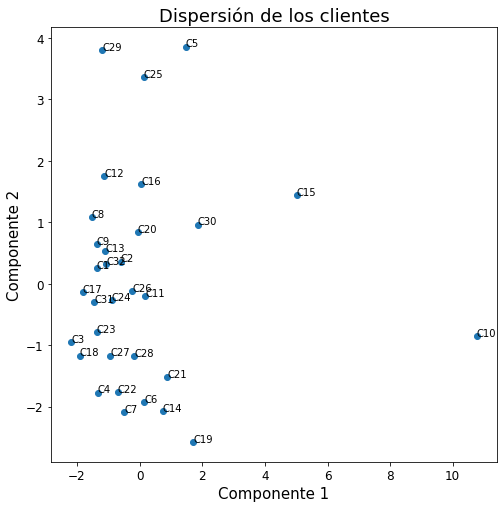

In [8]:
# Asignamos los componentes a dos variables
xs = pca_features[:,0]
ys = pca_features[:,1]

#Extraemos las etiquetas de las clientes
cost = df['costumer']
cost = np.asarray(cost)

# Generemos el diagrama de dispersión
plt.figure(figsize=(8, 8))
plt.scatter(xs, ys)

for i, n in enumerate(cost):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Dispersión de los clientes', fontsize = 18)
plt.xlabel('Componente 1', fontsize = 15)
plt.ylabel('Componente 2', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

¿Podemos observar alguna agrupación natural en los clientes?

## Clústeres por KMedias

Para hacer la segmentación de clientes aplicaremos la técnica de KMedias, una de las más utilizadas en machine learning para este objetivo. En un análisis previo, se debe determinar cuántos centroides son los adecuados para segmentar ... en nuestro caso particular puedo adelantarte que 5 son los apropiados

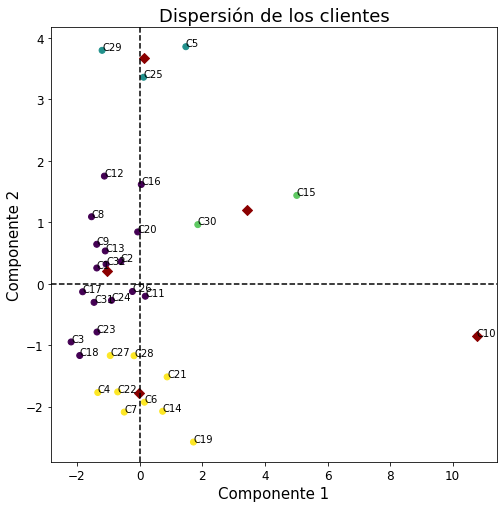

In [9]:
# Generamos nuestra instancia con 5 clústeres
model = KMeans(n_clusters = 5)

# Ajustamos el modelo a nuestros datos y predecimos los centroides
labels = model.fit_predict(pca_features)

# Obtenemos los centroides y separamos sus coordenadas
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Observemos nuevamente nuestro gráfico de dispersión con la clusterización de los clientes
plt.figure(figsize = (8, 8))

plt.scatter(xs, ys, c = labels)
plt.scatter(centroids_x, centroids_y, marker="D", s=50, color = 'darkred')

for i, n in enumerate(cost):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Dispersión de los clientes', fontsize = 18)
plt.xlabel('Componente 1', fontsize = 15)
plt.ylabel('Componente 2', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.axhline(y = ys.mean(), linestyle = '--', color = 'black')
plt.axvline(x = xs.mean(), linestyle = '--', color = 'black')
plt.show()

In [10]:
# Obtener los centroides
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## Agregarlos al dataframe
df['cluster'] = labels
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4]})

Vamos a mejorar nuestra visualización con algunos elementos

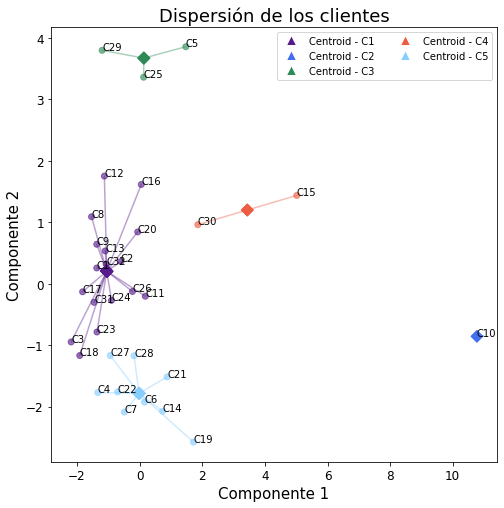

In [11]:
from matplotlib.lines import Line2D

colors = ['#551A8B', '#436EEE', '#2E8B57', '#EE5C42', '#87CEFF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

plt.figure(figsize = (8, 8))

plt.scatter(df['pca1'], df['pca2'], c = df['c'], alpha = 0.6)
plt.scatter(df['cen_x'], df['cen_y'], marker="D", s=70, color = df['c'])

for idx, val in df.iterrows():
    x = [val['pca1'], val['cen_x']]
    y = [val['pca2'], val['cen_y']]
    plt.plot(x, y, color = val['c'], alpha = 0.4)

cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
plt.legend(handles=cent_leg, loc='upper right', ncol=2)

for i, n in enumerate(cost):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Dispersión de los clientes', fontsize = 18)
plt.xlabel('Componente 1', fontsize = 15)
plt.ylabel('Componente 2', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()